In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
"/content/drive/MyDrive/deep/images_001.zip"

'/content/drive/MyDrive/deep/images_001.zip'

In [7]:
"/content/drive/MyDrive/deep/images_003.zip"

'/content/drive/MyDrive/deep/images_003.zip'

In [8]:
import zipfile

# zipファイルのパス
zip_path = "/content/drive/MyDrive/deep/images_001.zip"


# 解凍先のディレクトリを "archive" に指定して解凍
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("archive")

print("解凍完了")  # 解凍が完了したことを表示


解凍完了


In [9]:
import zipfile
import os # Import the os module

# zipファイルのパス
zip_path = "/content/drive/MyDrive/deep/images_003.zip"

# ファイルの存在を確認
if not os.path.exists(zip_path):
    print(f"Error: File not found at {zip_path}. Please check the path and ensure Google Drive is mounted.")
else:
    # 解凍先のディレクトリを "archive" に指定して解凍
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall("archive")

    print("解凍完了")  # 解凍が完了したことを表示

解凍完了


In [10]:
import os
print(os.listdir("archive")) # List the contents of the extracted directory

['images_001', '__MACOSX', 'images_003']


In [11]:
import pandas as pd

csv_path = "/content/drive/MyDrive/deep/Data_Entry_2017.csv"

df = pd.read_csv(csv_path)

df.head

<bound method NDFrame.head of              Image Index          Finding Labels  Follow-up #  Patient ID  \
0       00000001_000.png            Cardiomegaly            0           1   
1       00000001_001.png  Cardiomegaly|Emphysema            1           1   
2       00000001_002.png   Cardiomegaly|Effusion            2           1   
3       00000002_000.png              No Finding            0           2   
4       00000003_000.png                  Hernia            0           3   
...                  ...                     ...          ...         ...   
112115  00030801_001.png          Mass|Pneumonia            1       30801   
112116  00030802_000.png              No Finding            0       30802   
112117  00030803_000.png              No Finding            0       30803   
112118  00030804_000.png              No Finding            0       30804   
112119  00030805_000.png              No Finding            0       30805   

        Patient Age Patient Gender View Position  OriginalImage[Width  \
0                58              M            PA                 2682   
1                58              M            PA                 2894   
2                58              M            PA                 2500   
3                81              M            PA                 2500   
4                81              F            PA                 2582   
...             ...            ...           ...                  ...   
112115           39              M            PA                 2048   
112116           29              M            PA                 2048   
112117           42              F            PA                 2048   
112118           30              F            PA                 2048   
112119           27              M            PA                 2048   

        Height]  OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0          2749                        0.143  0.143          NaN  
1          2729                        0.143  0.143          NaN  
2          2048                        0.168  0.168          NaN  
3          2048                        0.171  0.171          NaN  
4          2991                        0.143  0.143          NaN  
...         ...                          ...    ...          ...  
112115     2500                        0.168  0.168          NaN  
112116     2500                        0.168  0.168          NaN  
112117     2500                        0.168  0.168          NaN  
112118     2500                        0.168  0.168          NaN  
112119     2500                        0.171  0.171          NaN  

[112120 rows x 12 columns]>

In [12]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/deep/Data_Entry_2017.csv")

# Massを含むかどうかで癌(1)　or 癌じゃない(0)のラベルを作る
df["Cancer"] = df["Finding Labels"].apply(lambda x: 1 if "Mass" in x else 0)
df_cancer = df[df["Cancer"] == 1]
print(len(df_cancer))  # 何件ある？


5782


In [15]:
import os
import pandas as pd

# 1. 陰性と陽性データを分ける
df_1 = df[df["Cancer"] == 1]
df_0 = df[df["Cancer"] == 0].sample(n=5782, random_state=42)

# 2. 陰陽データを結合（Cancer=0と1をバランスよく）
df_balanced = pd.concat([df_0, df_1])

# 3. 実際に画像が存在する行だけ抽出
valid_rows = []
for idx, row in df_balanced.iterrows():
    filename = row["Image Index"]
    image_path = os.path.join("archive/images_001/images", "archive/images_003/images", filename)
    if os.path.exists(image_path):
        valid_rows.append(row)

# 4. 新しいDataFrameにまとめる
df_valid = pd.DataFrame(valid_rows)
print("有効な画像の数:", len(df_valid))


有効な画像の数: 0


In [10]:
import os
from tqdm import tqdm
import cv2
import numpy as np

# image_dirを修正して、解凍先のディレクトリ内の画像ディレクトリを指すようにします
# Fix image_dir to point to the image directory within the extraction directory
image_dir = "archive/images_001/images"

images = []
labels = []

for idx, row in tqdm(df_balanced.iterrows(), total=len(df_balanced)):
  filename = row["Image Index"]
  label = row["Cancer"]
  image_path = os.path.join(image_dir, filename)



  if os.path.exists(image_path):
    img = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = cv2.resize(img, (224, 224))
    images.append(img)
    labels.append(label)


X = np.array(images)
y = np.array(labels)


print("画像データの形:", len(X))
print("ラベルの形:", len(y))

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True
)








100%|██████████| 11564/11564 [00:08<00:00, 1286.23it/s]

画像データの形: 439
ラベルの形: 439


In [11]:
print("Xの中身の数:",len(X))
print("ラベルの数:", len(y))

Xの中身の数: 439
ラベルの数: 439


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers, models
import tensorflow as tf
import numpy as np

X = X / 255.0

X = X.reshape(-1, 224, 224, 3)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
)

datagen.fit(X_train)

print("学習データ数:", len(X_train))
print("テストデータ数:", len(X_test))



学習データ数: 351
テストデータ数: 88


In [17]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # 転移学習のため最初は凍結

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # バイナリ分類
])

In [18]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall()]
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss',factor=0.5, patience=2, verbose=1)
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=30,
    class_weight=class_weights_dict,
    callbacks=[early_stop, lr_reduce]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 112s 8s/step - accuracy: 0.5885 - auc: 0.4683 - loss: 0.7298 - recall: 0.2062 - val_accuracy: 0.4659 - val_auc: 0.5206 - val_loss: 0.7328 - val_recall: 0.6562 - learning_rate: 1.0000e-04
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 81s 8s/step - accuracy: 0.5697 - auc: 0.5168 - loss: 0.7053 - recall: 0.2767 - val_accuracy: 0.5114 - val_auc: 0.5279 - val_loss: 0.7112 - val_recall: 0.5938 - learning_rate: 1.0000e-04
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 84s 8s/step - accuracy: 0.4517 - auc: 0.4735 - loss: 0.7015 - recall: 0.3990 - val_accuracy: 0.5682 - val_auc: 0.5251 - val_loss: 0.6972 - val_recall: 0.5938 - learning_rate: 1.0000e-04
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 80s 8s/step - accuracy: 0.5205 - auc: 0.5116 - loss: 0.6930 - recall: 0.5437 - val_accuracy: 0.5795 - val_auc: 0.5223 - val_loss: 0.6788 - val_recall: 0.2500 - learning_rate: 1.0000e-04
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - accuracy: 0.5025 - auc: 0.5620 - loss: 0.6855 - rec

In [19]:
test_loss, test_acc, test_auc, test_recall = model.evaluate(X_test, y_test)
print("テスト精度:", test_acc)
print("テストAUC:", test_auc)
print("テストRecall:", test_recall) # 再現率

3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.6037 - auc: 0.4781 - loss: 0.7011 - recall: 0.1449
テスト精度: 0.6136363744735718
テストAUC: 0.5103236436843872
テストRecall: 0.125


In [20]:
# モデルを保存する
model.save("cancer_detector_model.h5")


In [2]:
from tensorflow.keras.models import load_model

model = load_model("cancer_detector_model.h5")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'cancer_detector_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [60]:
# Assuming the model has been loaded into the 'model' variable
# and the image has been loaded and preprocessed into the 'img' variable.
# The 'img' variable should have the shape (1, 224, 224, 3) based on previous cells.

# 画像予測
prediction = model.predict(img)

# You can now print the prediction score
print("予測スコア：", prediction[0])


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 224), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32, 224)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224), dtype=float32)
  • training=False
  • mask=None

In [55]:
import cv2
import numpy as np
from google.colab import files # ファイルを読み込む

# ファイルをアップロード
upload = files.upload()

# ファイルがアップロードされたか確認
if not upload:
    print("No file uploaded.")
else:
    file_name = list(upload.keys())[0]

    print(f"Uploaded file: {file_name}")

    # 画像を読み込む
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)


    if img is None:
        print(f"Error loading image: {file_name}. Please check if the file name is correct and the file is not corrupted.")
    else:
        # 画像サイズ変更
        img = cv2.resize(img, (224, 224))

        # 0~1の範囲にする
        img = img / 255.0

        # 形を整える
        img = img.reshape(1, 224, 224, 3)

        print("Image loaded and processed successfully.")
        # You can now use 'img' for prediction or further processing

Saving 癌.jpg to 癌 (3).jpg
Uploaded file: 癌 (3).jpg


ValueError: cannot reshape array of size 50176 into shape (1,224,224,3)

In [160]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model = load_model("cancer_detector_model.h5")

# 画像予測
prediction = model.predict(img)

# 結果表示
if prediction[0] > 0.5:
  print("AIの予測: 癌の可能性があります(陽性)")
  result = "AIの予測: 癌の可能性があります(陽性)"
else:
  print("AIの予測: 癌は見られません(陰性)")
  result = "AIの予測: 癌は見られません(陰性)"



# 画像と結果表示
plt.figure(figsize=(4,4))
plt.imshow(img.reshape(128, 128), cmap="gray")
plt.title(result)
plt.axis("off")
plt.show()

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(32, 128), dtype=float32). Expected shape (None, 128, 128, 1), but input has incompatible shape (32, 128)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 128), dtype=uint8)
  • training=False
  • mask=None

In [ ]:
# モデルを保存する
model.save("cancer_detector_model.h5")


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("cancer_detector_model.h5")


In [ ]:
import cv2
import numpy as np
from google.colab import files # ファイルを読み込む

# ファイルをアップロード
upload = files.upload()

# ファイルがアップロードされたか確認
if not upload:
    print("No file uploaded.")
else:
    file_name = list(upload.keys())[0]

    print(f"Uploaded file: {file_name}")

    # 画像を読み込む
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)


    if img is None:
        print(f"Error loading image: {file_name}. Please check if the file name is correct and the file is not corrupted.")
    else:
        # 画像サイズ変更
        img = cv2.resize(img, (128, 128))

        # 0~1の範囲にする
        img = img / 255.0

        # 形を整える
        img = img.reshape(1, 128, 128, 1)

        print("Image loaded and processed successfully.")
        # You can now use 'img' for prediction or further processing

Saving 癌.jpg to 癌 (1).jpg
Uploaded file: 癌 (1).jpg
Image loaded and processed successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
AIの予測: 癌は見られません(陰性)


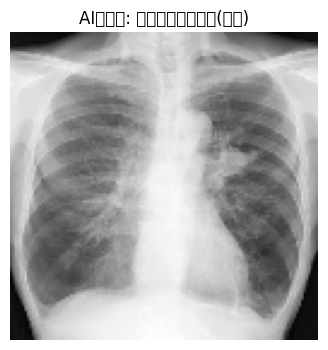

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model = load_model("cancer_detector_model.h5")

# 画像予測
prediction = model.predict(img)

# 結果表示
if prediction[0] > 0.5:
  print("AIの予測: 癌の可能性があります(陽性)")
  result = "AIの予測：癌の可能性があります(陽性)"
else:
  print("AIの予測: 癌は見られません(陰性)")
  result = "AIの予測: 癌は見られません(陰性)"



# 画像と結果表示
plt.figure(figsize=(4,4))
plt.imshow(img.reshape(128, 128), cmap="gray")
plt.title(result)
plt.axis("off")
plt.show()

In [ ]:
# モデルを保存する
model.save("cancer_detector_model.h5")
